In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [2]:
weatherData = pd.read_csv('nycWeather.csv', usecols = [0,1,2,3], 
                          names=['date', 'maxTemp', 'minTemp', 'avgTemp'], header=0)

In [3]:
weatherData.head()

,date,maxTemp,minTemp,avgTemp
0,1-1-2016,42,34,38.0
1,2-1-2016,40,32,36.0
2,3-1-2016,45,35,40.0
3,4-1-2016,36,14,25.0
4,5-1-2016,29,11,20.0


In [4]:
def countNan(dataset):
    for col in dataset.columns.tolist():
        naCount = sum(pd.isna(dataset[col]))
        print(str(col) + ": " + str(naCount))

countNan(weatherData)

date: 0
maxTemp: 0
minTemp: 0
avgTemp: 0


In [5]:
nanData = pd.read_csv('nycWeather.csv', usecols = [0,1,2,3], 
                          names=['date', 'maxTemp', 'minTemp', 'avgTemp'], header=0)
random_indices1 = np.random.choice(nanData.index, size=100, replace=False)
random_indices2 = np.random.choice(nanData.index, size=100, replace=False)
random_indices3 = np.random.choice(nanData.index, size=100, replace=False)

nanData.loc[random_indices1, 'maxTemp'] = np.nan
nanData.loc[random_indices2, 'minTemp'] = np.nan
nanData.loc[random_indices3, 'avgTemp'] = np.nan

countNan(nanData)

date: 0
maxTemp: 100
minTemp: 100
avgTemp: 100


In [6]:
interpolatedData = nanData.interpolate()

In [7]:
countNan(interpolatedData)

date: 0
maxTemp: 0
minTemp: 0
avgTemp: 1


In [8]:

def plotComparision(Data1, Data2):
    x = 0
    y = 33
    nan_indices = np.isnan(nanData['maxTemp'])
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.subplots_adjust(hspace=0.5)

    for i in range(0, 3):
        axs[i].plot(Data1['date'][nan_indices][x:y], Data1['maxTemp'][nan_indices][x:y], label='original', color='blue')
        axs[i].plot(Data2['date'][nan_indices][x:y], Data2['maxTemp'][nan_indices][x:y], label='interpolated', color='red')
        axs[i].set_xticks([])
        axs[i].set_xlabel(str(x) + " - " + str(y))
        x = y
        y += 33
    plt.legend()
    plt.show()


In [9]:
spineNanData = nanData.copy()
if(pd.isna(spineNanData['maxTemp'][0])):
    spineNanData = spineNanData.drop(spineNanData.index[0])

not_nan_indices = ~np.isnan(spineNanData['maxTemp'])
spline_interp = interp1d(spineNanData.index[not_nan_indices], spineNanData['maxTemp'][not_nan_indices], kind='cubic')
maxTemp_interp = spline_interp(spineNanData.index)
spineNanData['maxTemp'] = np.where(np.isnan(spineNanData['maxTemp']), maxTemp_interp, spineNanData['maxTemp'])


In [10]:
spineNanData1 = nanData.copy()
if(pd.isna(spineNanData1['maxTemp'][0])):
    spineNanData = spineNanData.drop(spineNanData1.index[0])


not_nan_indices = ~np.isnan(spineNanData1['maxTemp'])
spline_interp = interp1d(spineNanData1.index[not_nan_indices], spineNanData1['maxTemp'][not_nan_indices], kind='linear')
maxTemp_interp = spline_interp(spineNanData1.index)
spineNanData1['maxTemp'] = np.where(np.isnan(spineNanData1['maxTemp']), maxTemp_interp, spineNanData1['maxTemp'])

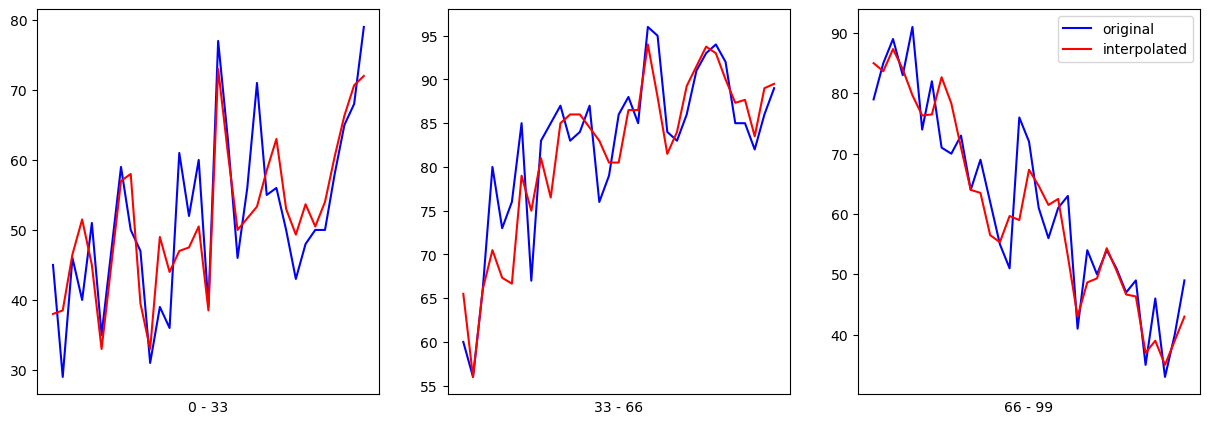

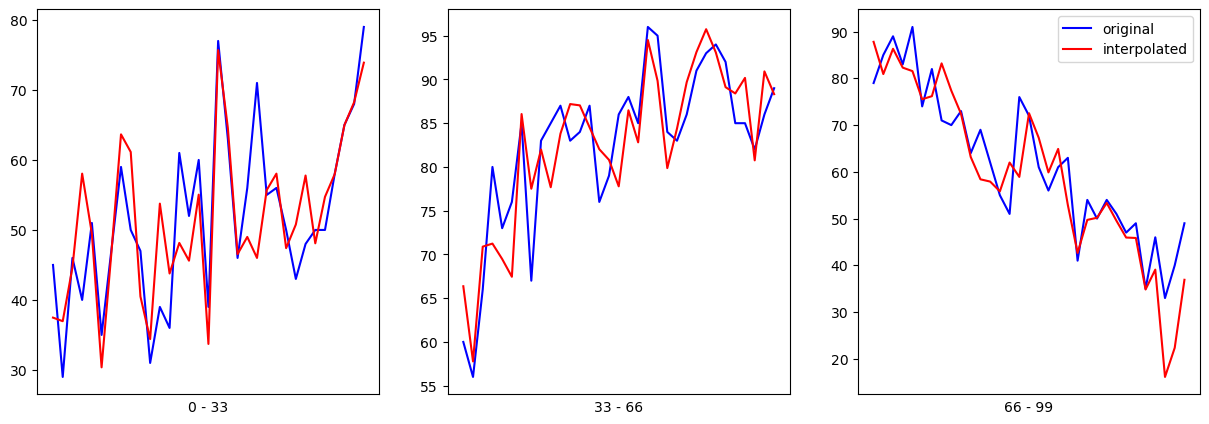

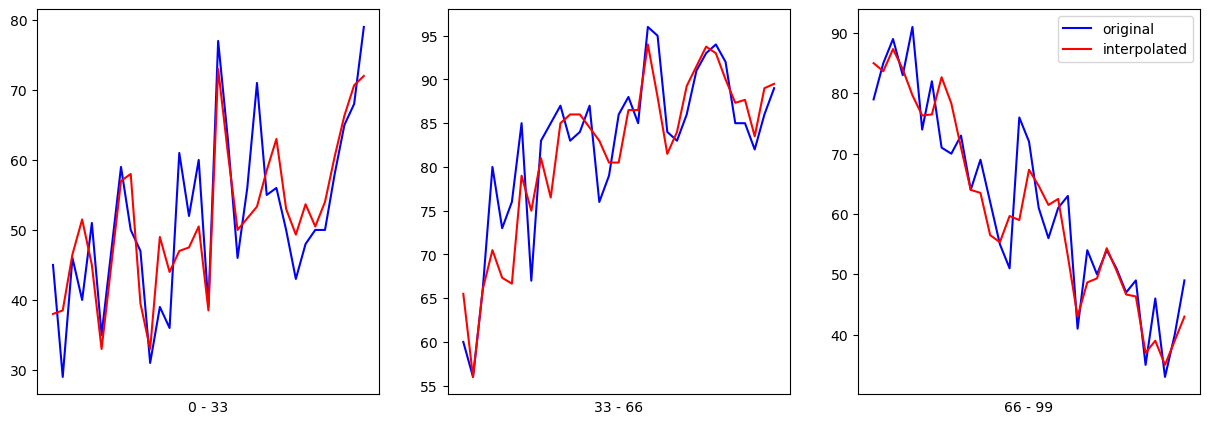

In [11]:
plotComparision(weatherData, interpolatedData)        
plotComparision(weatherData, spineNanData)
plotComparision(weatherData, spineNanData1)

In [12]:
ignore = '''SimpleImputer from sklearn

|  strategy : str, default='mean'
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        each column. Can only be used with numeric data.
 |      - If "median", then replace missing values using the median along
 |        each column. Can only be used with numeric data.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along each column. Can be used with strings or numeric data.
 |        If there is more than one such value, only the smallest is returned.
 |      - If "constant", then replace missing values with fill_value. Can be
 |        used with strings or numeric data.
 |  
 |      .. versionadded:: 0.20
 |         strategy="constant" for fixed value imputation.

Strategies are too simple and may not be that use full in real world data so we wont go into this

'''

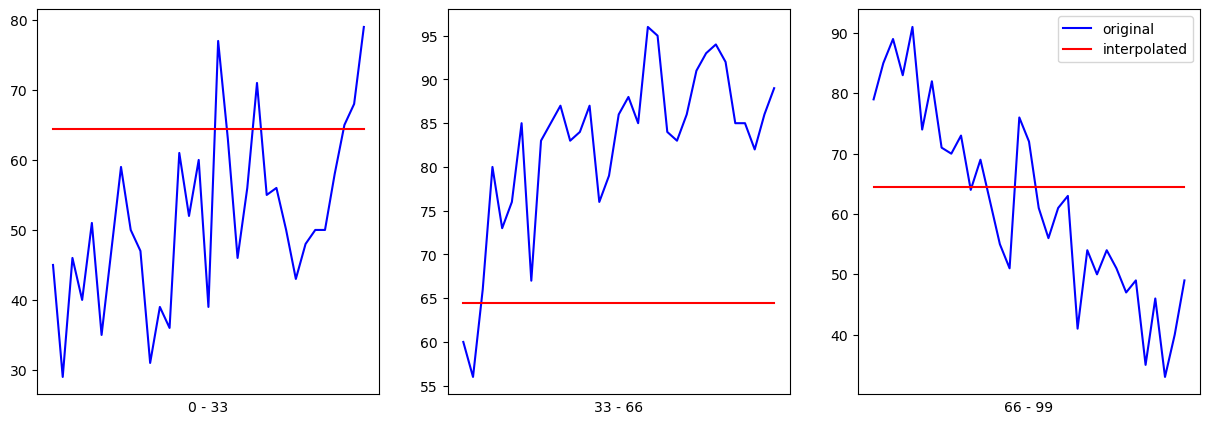

In [13]:
knnNanData = nanData.copy()

imputer = KNNImputer(n_neighbors=5)
col_data = knnNanData['maxTemp'].values.reshape(-1, 1)

knnNanData['maxTemp'] = imputer.fit_transform(col_data)
plotComparision(weatherData, knnNanData)     

#Some Issue
